# S03 T01: Visualització gràfica d'un dataset


## Nivel 1

### Ejercicio 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
delayFlights = pd.read_csv('DelayedFlightsLIMPIO.csv', index_col = 0)

#quita la notación científica
pd.options.display.float_format = '{:,.1f}'.format 

delayFlights

,Month,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanFlight/h,TypesOfDeley
0,1,"2,003.0",1955,"2,211.0",2225,WN,128.0,150.0,116.0,-14.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,419.0,onTime
1,1,754.0,735,"1,002.0",1000,WN,128.0,145.0,113.0,2.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,430.1,onTime
2,1,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,406.6,onTime
4,1,"1,829.0",1755,"1,959.0",1925,WN,90.0,90.0,77.0,34.0,...,0,N,0,2.0,0.0,0.0,0.0,32.0,401.3,shortDelay
5,1,"1,940.0",1915,"2,121.0",2110,WN,101.0,115.0,87.0,11.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,474.5,onTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,"1,250.0",1220,"1,617.0",1552,DL,147.0,152.0,120.0,25.0,...,0,N,0,3.0,0.0,0.0,0.0,22.0,453.0,shortDelay
7009717,12,657.0,600,904.0,749,DL,127.0,109.0,78.0,75.0,...,0,N,0,0.0,57.0,18.0,0.0,0.0,370.0,delay
7009718,12,"1,007.0",847,"1,149.0",1010,DL,162.0,143.0,122.0,99.0,...,0,N,0,1.0,0.0,19.0,0.0,79.0,338.9,longDelay
7009726,12,"1,251.0",1240,"1,446.0",1437,DL,115.0,117.0,89.0,9.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,359.3,onTime


#### Una variable categòrica (UniqueCarrier)

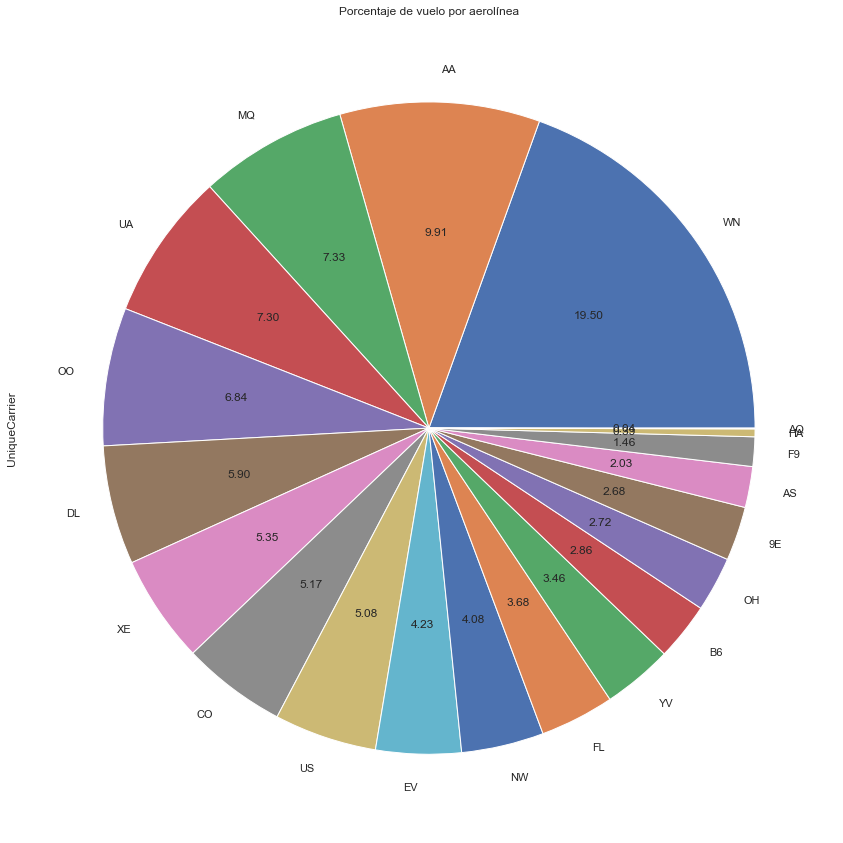

In [51]:
# Gráfico de tarta de vuelos por aerolínea

delayFlights['UniqueCarrier'].value_counts().plot(kind='pie', 
                                                     autopct='%.2f', 
                                                     figsize=(15, 15), 
                                                     title='Porcentaje de vuelo por aerolínea')
plt.savefig("imagen1.jpg")
plt.show()
                                                                                                      

**El gráfico muestra la distribución del total de vuelos por cada empresa, puesta en porcentaje. 
De la distribución podemos ver que hay una empresa con una gran concentración de vuelos en comparación a las otras, que es WN (Southwest Airlines) con el 19,50% de lo vuelos, que representa más del doble de la segunda aerolínea. 
Luego podrían dividirse las demás 19 aerolíneas en dos grupos: entre la segunda, con el el 9,91% de AA (American airlines) y 5,08% de US (US Airways). Y, finalmente, las pequeñas enpresas que tiene por debajo del 4, 23% de los vuelos**

#### Una variable numèrica (ArrDelay)

Averiguo los datos máximos y mínimos para imaginar el gráfico

In [4]:
#averiguo máximo y minimo del data ArrDeley
print (delayFlights['ArrDelay'].max(),
delayFlights['ArrDelay'].min())



2461.0 -109.0


Dos gráficos similares sobre la densidad de la variable Arrived Deley (con y sin curva)

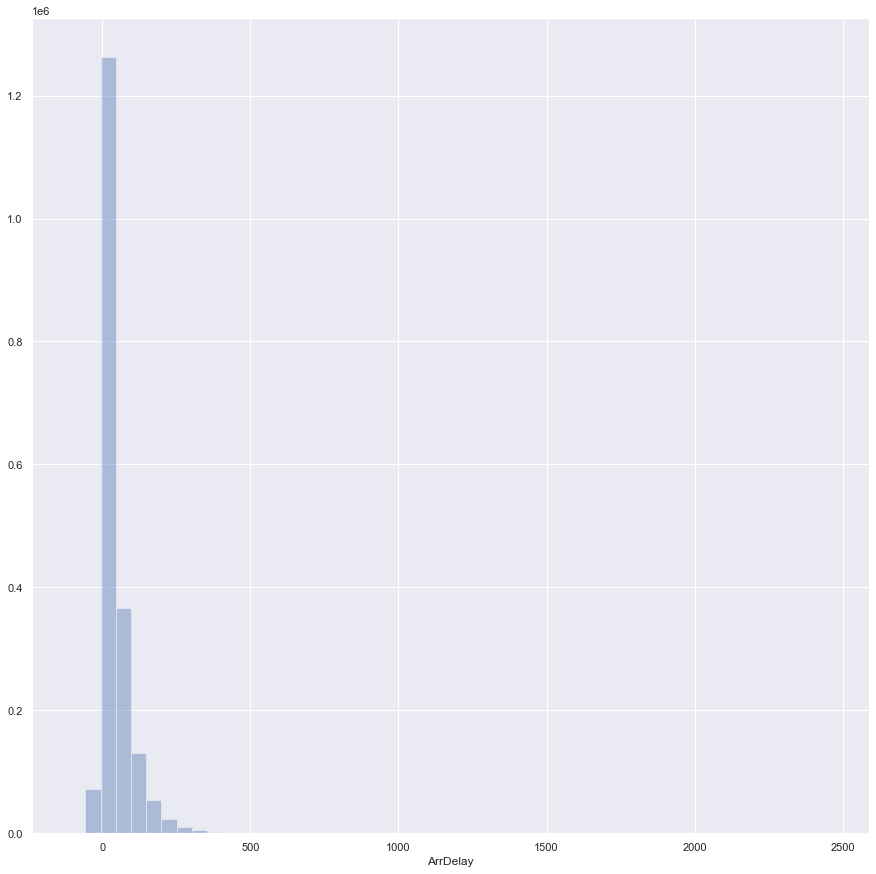

In [50]:
# Plot the histogram thanks to the distplot function
fig = plt.figure(figsize=(15, 15))

sns.distplot( a=delayFlights['ArrDelay'], hist=True, kde=False, rug=False)

plt.savefig("imagen2.jpg")

plt.show()

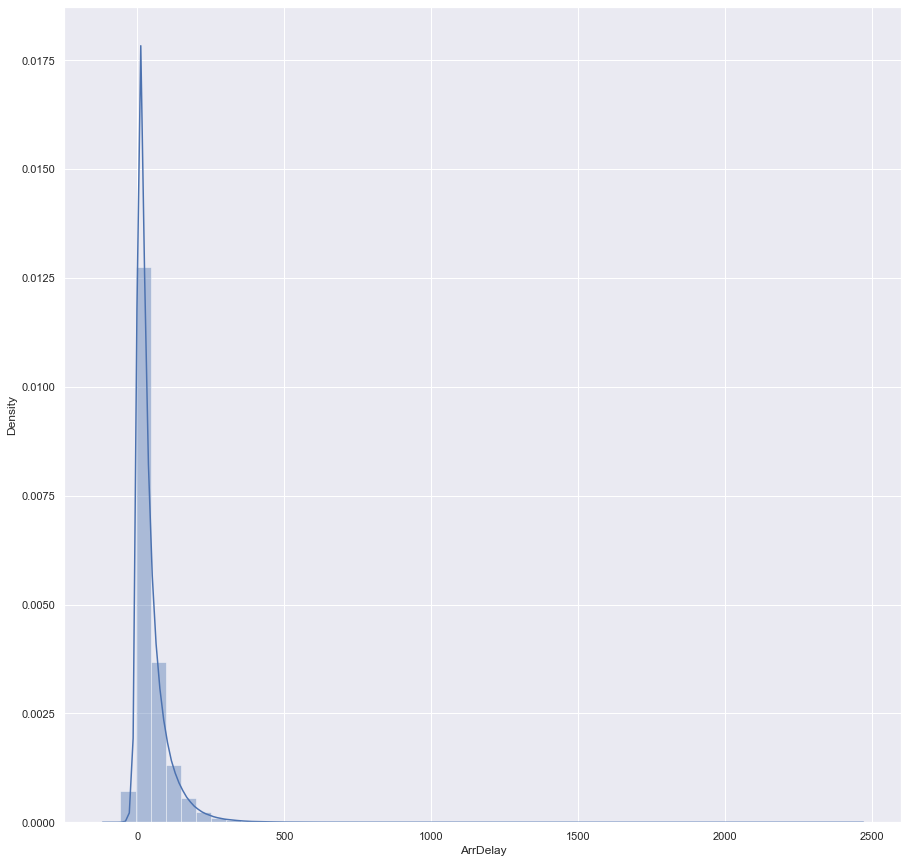

In [49]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

fig = plt.figure(figsize=(15, 15))
sns.distplot(delayFlights['ArrDelay'])



#sns.histplot(data=df, x= "Array Delay", kde=True)

plt.savefig("imagen3.jpg")
plt.show()



Al ver que la mayoría de los retrasos están concentrado en una zona determinada del gráfico, recorto el mismo:

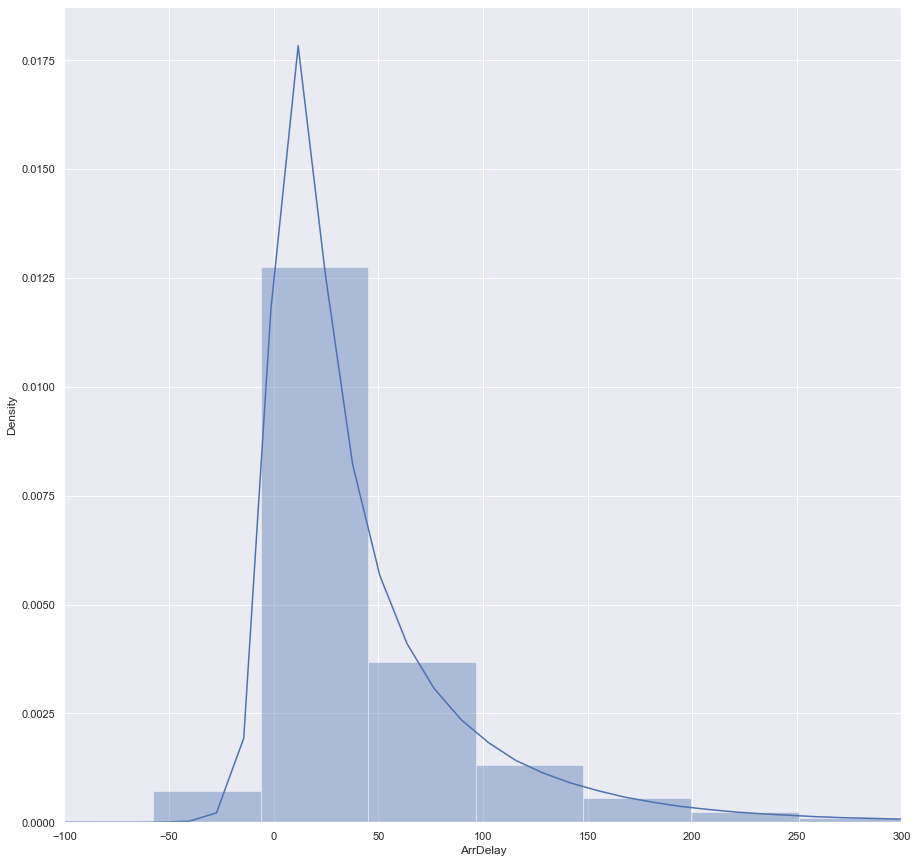

In [52]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

fig = plt.figure(figsize=(15, 15))
sns.distplot(delayFlights['ArrDelay'])


plt.xlim(-100,300)

#sns.histplot(data=df, x= "Array Delay", kde=True)

plt.savefig("imagen3.jpg")

plt.show()


**Existe una clara densidad de los retrasos en torno a los 50 minutos posteriores al horario esperado de salida. Este resultado está dentro de lo esperado. Sin embargo, no deja de llamar la atantención la densisdad de retrasos que se prodecuen entre el minuto 50 y el 100.
Otro asunto que podría revisarse es la densidad de vuelos que despegan antes de la hora programada, incluso más de 50 minutos previos a horario.**

#### Una variable numérica y una categórica (ArrDelay y UniqueCarrier)

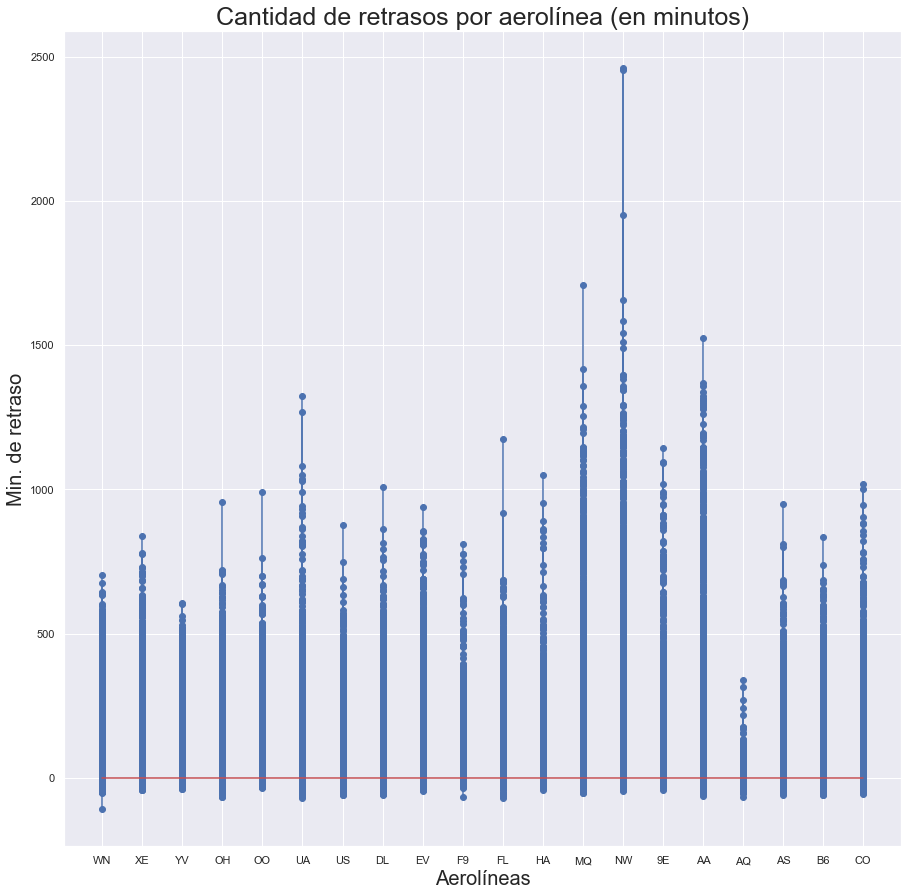

In [53]:
#Gráfico Lollipop Chart

x = delayFlights['UniqueCarrier']
y = delayFlights['ArrDelay']

fig = plt.figure(figsize=(15, 15))
plt.stem(x, y, use_line_collection = True)
plt.title('Cantidad de retrasos por aerolínea (en minutos)', fontsize=25)
plt.xlabel('Aerolíneas', fontsize=20)
plt.ylabel('Min. de retraso', fontsize=20)

plt.savefig("imagen4.jpg")
plt.show()

**Se observa en cada barra vertical los vuelos perdidos por cada aerolínea y en la horizantal los minutos.
El gráfico tiene interés para observar, principalmente, los excesos má prolongados por aerolínea, viendo cuáles son sus demoras más largas.
Además el grosor de la barra muestra que algunas aerolíneas tiene una importante cantidad de retrasos por encima de los 500 minutos, incluso en algunos caso encima de los 1000.**

Agrupo las compañías, extraigo el promedio de sus retrasos, las ordeno en forma ascendente y grafico

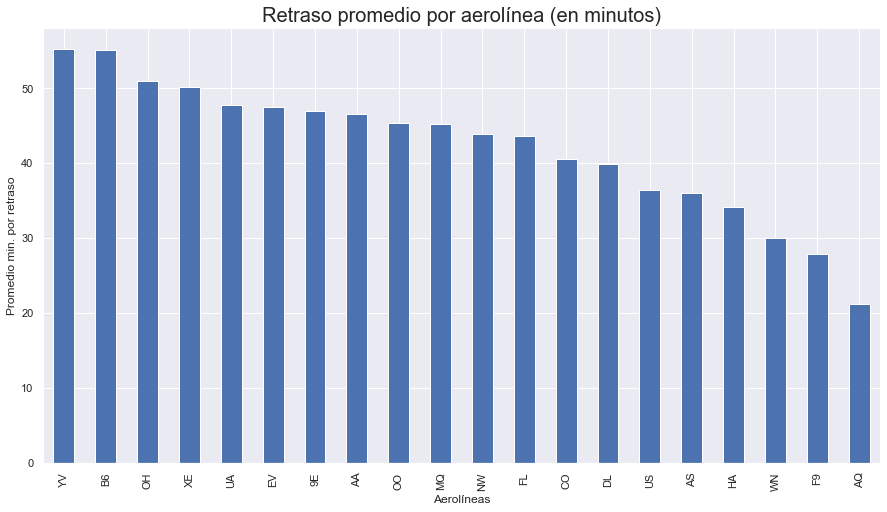

In [54]:
#agrupo el DATA por aerolínea
companies = delayFlights.groupby('UniqueCarrier')

companies.count()

#Sumo los mínutos retrasados por aerolínea
companies['ArrDelay'].agg(np.sum)

#promedio de minutos por aerolínea
delayCompanies = companies['ArrDelay'].agg(np.mean)

#Ordeno de mayor a menor la lista
delayCompaniesORD = delayCompanies.sort_values(ascending = False)

plt.figure(figsize = (15,8))
delayCompaniesORD.plot(kind = "bar")

plt.title("Retraso promedio por aerolínea (en minutos)", fontsize = 20)
plt.xlabel("Aerolíneas")
plt.ylabel("Promedio min. por retraso")

plt.savefig("imagen5.jpg")
plt.show()


**El gráfico muestra el promedio de minutos de retraso por aerolínea cuando se producen arribos fuera de la hora programada. 
Se ve que todas tienen un promedio por encima de los 20 minutos, y la gran mayoría por encima de los 30. 
Podrían dividirse las compañias en dos grupos, por encima de los 40 minutos de retraso de promedio hay 12 compañías y por debajo de los 40 hay 9.
NOTA: en este promedio, los vuelos arribados antes del tiempo son contemplados para bajar el promedio de retraso. Podría prescindirse de los mismo si fuera necesario**

#### Dos variables numériques (ArrDelay y DepDelay)

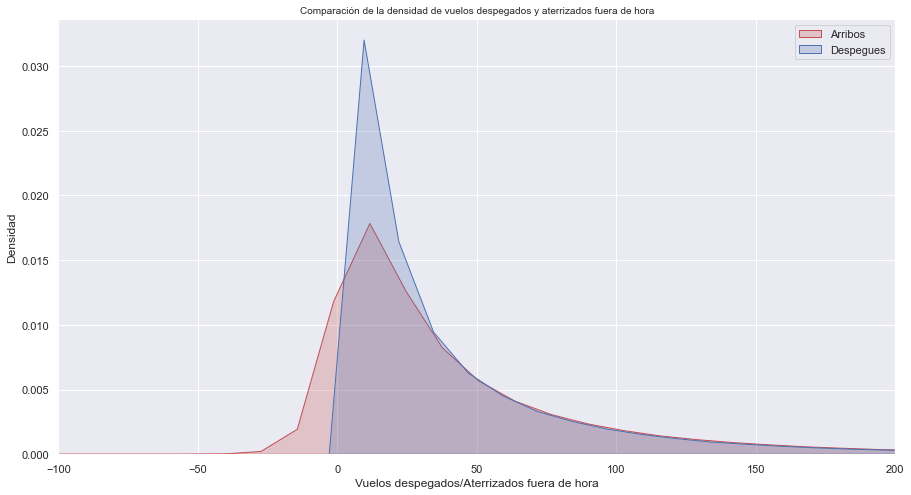

In [55]:
sns.set_theme(style="darkgrid")
df = sns.load_dataset('iris')
plt.figure(figsize = (15,8))
 

# plotttin de la densidad de ambos parámetros en la misma figura
fig = sns.kdeplot(delayFlights['ArrDelay'],shade=True, color = 'r')
fig = sns.kdeplot(delayFlights['DepDelay'], shade=True, color='b')


plt.title("Comparación de la densidad de vuelos despegados y aterrizados fuera de hora", fontsize=10)
plt.ylabel('Densidad')
plt.xlabel('Vuelos despegados/Aterrizados fuera de hora')

plt.legend(['Arribos', 'Despegues'])
plt.xlim(-100,200)

plt.savefig("imagen6.jpg")
plt.show()

**El gráfico muestra la densidad de las variables de despegue tarde y arribo tarde. Se observa que hay una correlación entre ambas, con un pico de mayor densidad en el caso de los arribos.**

Grafico la correlación de las variables:

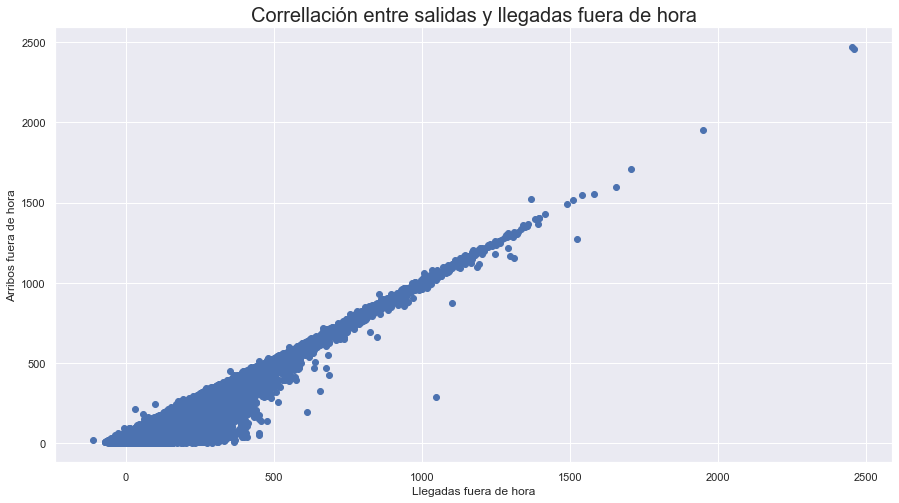

In [56]:
x = delayFlights['ArrDelay']
y = delayFlights ['DepDelay']

plt.figure(figsize = (15,8))
plt.scatter(x, y)
plt.title('Correllación entre salidas y llegadas fuera de hora', fontsize = 20)
plt.xlabel('Llegadas fuera de hora')
plt.ylabel('Arribos fuera de hora')

plt.savefig("imagen7.jpg")
plt.show()

**La correlación, como era de esperarse, es muy alta entre salidas tarde y arribos tardes.**

In [12]:
#uso de la función .corr para saber el número exacto:

delayFlights[['ArrDelay', 'DepDelay']].corr()

,ArrDelay,DepDelay
ArrDelay,1.0,1.0
DepDelay,1.0,1.0


In [13]:
#correlación utilizando el método kendall
delayFlights[['ArrDelay', 'DepDelay']].corr(method= "kendall")

,ArrDelay,DepDelay
ArrDelay,1.0,0.7
DepDelay,0.7,1.0


Extrañamente la correlación da 1, porque si bien es muy alta no es perfecta. No logro descifrar por qué da esa cifra.
Usando el método de correlación kendall si da un número diferente: 0,7. Aunque este parece un némero bajo para la alta correlación existente.

#### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

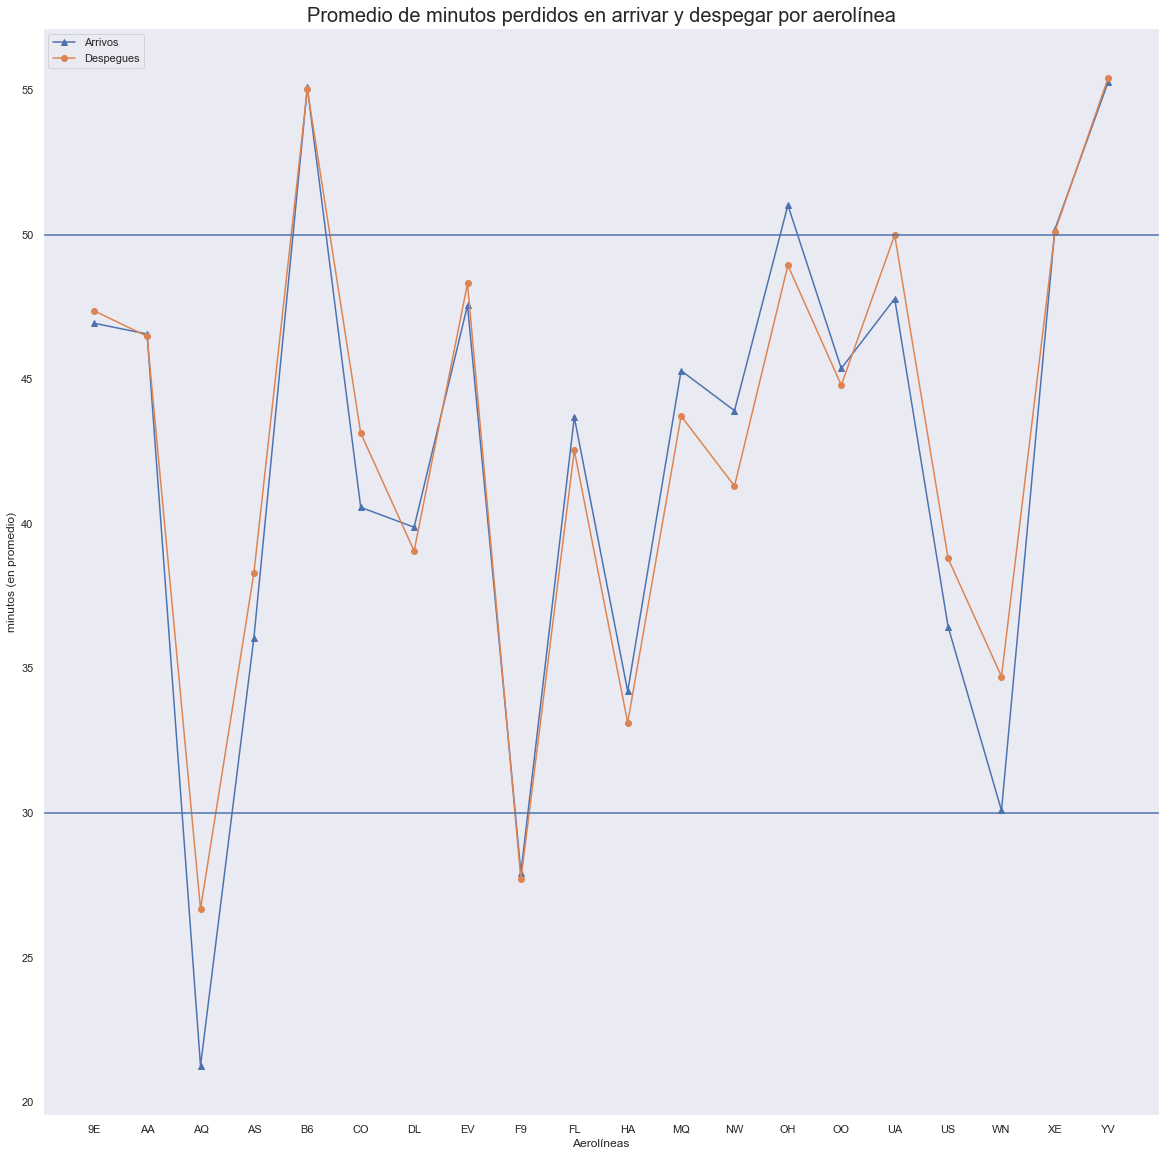

In [57]:
#agrupo el DATA por aerolínea
companies = delayFlights.groupby('UniqueCarrier')

#Defino cual será cada variable
y1 = companies['ArrDelay'].agg(np.mean)
y2 = companies['DepDelay'].agg(np.mean)

#diseño la figura
plt.figure(figsize=(20,20)) #tamaño del gáfico
plt.title('Promedio de minutos perdidos en arrivar y despegar por aerolínea', fontsize = 20) #título
plt.xlabel('Aerolíneas') #nombre de la x
plt.ylabel('minutos (en promedio)') #nombre de la y
plt.plot(y1, label = 'Arrivos', marker = '^') #qué es la variable, su nombre y una marca en cada punto.
plt.plot(y2, label = 'Despegues', marker = 'o') #qué es la variable, su nombre y una marca en cada punto.

#líneas horizontales
plt.axhline(y=50, xmin=0.0, xmax=1.0) #Creo una línea horizontal en el minuto 50
plt.axhline(y=30, xmin=0.0, xmax=1.0)#Creo una línea horizontal en el minuto 30
plt.grid()

plt.legend(loc='upper left') #creo la leyenda y la ubico

plt.savefig("imagen8.jpg")
plt.show() # ploteo


**El gráfico permite ver, por un lado, que la correlación entre despegues y aterrizajes retrasados en general se mantiene en cada aerolínea. Sin embargo, dos compañías tienen una diferencia más pronunciada entre estas variables: 9 Air (AQ) y Southwest Airlines (WN), donde los retrasos de salida son en promedio bastante más alto que los de llegada.
Por otro lado, vemos que el conjunto de las aerolíneas mantienen como promedio de retraso (salida y llegada) entre 30 y 50 minutos. Las excepciones son 9 Air, sin duda mucho más puntual que el resto, acompañada por Frontier (F9), aunque está más cercana del pelotón mayoritario. Por el contrario, JetBlue(B6) y Janet (YV)**


#### Más de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


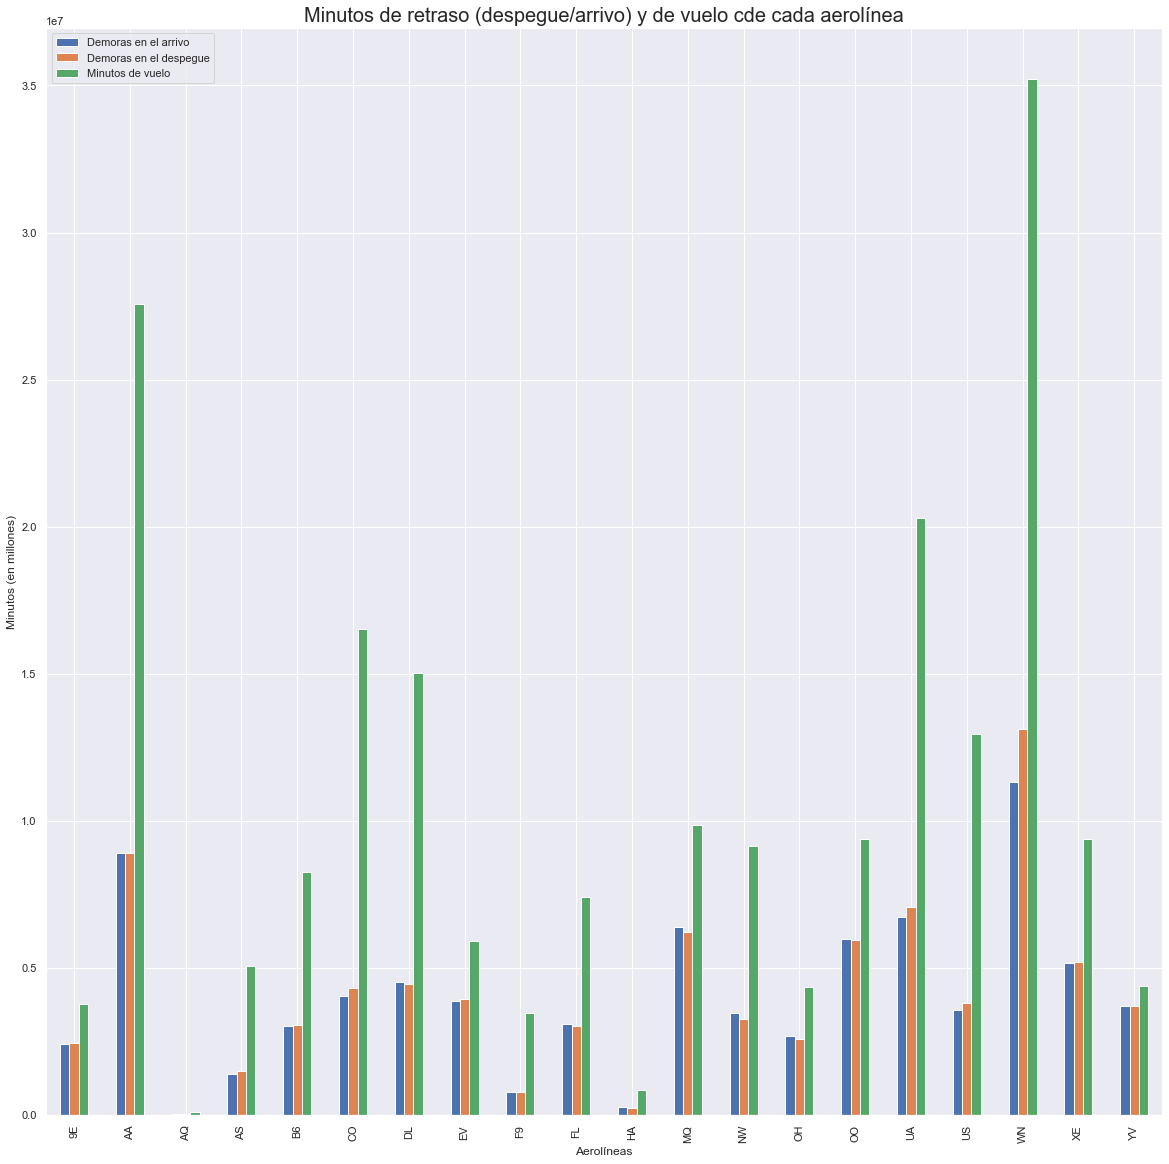

In [58]:
#agrupo el DATA por aerolínea
companies = delayFlights.groupby('UniqueCarrier')


#Sumo los mínutos retrasados (despegue y aterrizaje) más los de vuelo por aerolínea
delayCompanies = companies['ArrDelay', 'DepDelay', 'AirTime'].agg(np.sum)

#defino tamaño del gráfico, que sea barras 
delayCompanies.plot(figsize = (20,20), kind = "bar") # si quisiera que sea apilada stacked = 'True' (pero no se ve bien)


plt.title("Minutos de retraso (despegue/arrivo) y de vuelo cde cada aerolínea", fontsize = 20)
plt.xlabel("Aerolíneas")
plt.ylabel("Minutos (en millones)")
plt.legend(['Demoras en el arrivo', 'Demoras en el despegue', 'Minutos de vuelo'], loc='upper left')

plt.savefig("imagen9.jpg")
plt.show()

**El gráfico permite comparar visualmente la relación entre los minutos de demora (tanto en arrivo como en salida) en relación con el tiempo de vuelo**

# Extra

In [ ]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
#sns.kdeplot(data=diamonds, x="price", hue="cut", cut=0, fill=True, common_norm=False, alpha=1)
sns.kdeplot(data=delayFlights['ArrDelay'], x=delayFlights['Month'])

plt.show()